#  COVID-19 Global Data Tracker

**Author**: David Mwendwa Kimeu  
**Date**: July 2025  
**Tools Used**: Python, pandas, matplotlib, seaborn, Jupyter Notebook

##  Introduction

This project analyzes global COVID-19 data from the Our World in Data dataset. The main goals are to:

- Explore trends in total cases, deaths, and vaccinations across selected countries (Kenya, USA, India).
- Perform data cleaning and analysis using Python.
- Visualize the data using charts to identify patterns and insights.
- Present a clear and informative report that could guide further study or policy considerations.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\covid\owid-covid-data.csv")

df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [3]:
# Show all column names in the dataset
df.columns.tolist()


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [4]:
# Show number of missing (null) values in each column
df.isnull().sum().sort_values(ascending=False)


weekly_icu_admissions                   418442
weekly_icu_admissions_per_million       418442
excess_mortality                        416024
excess_mortality_cumulative_absolute    416024
excess_mortality_cumulative             416024
                                         ...  
total_cases_per_million                  17631
location                                     0
iso_code                                     0
date                                         0
population                                   0
Length: 67, dtype: int64

In [5]:
# See how many countries/regions are in the data
df['location'].nunique()

# Show a few country names
df['location'].unique()[:10]


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina'], dtype=object)

In [6]:
df['location'].nunique()
df['location'].unique()[:10]


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina'], dtype=object)

In [7]:
# Filter for 3 countries of interest
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]


In [8]:
# Convert date column to datetime type
df['date'] = pd.to_datetime(df['date'])


In [9]:
# Fill missing numeric values with 0
df.fillna(0, inplace=True)


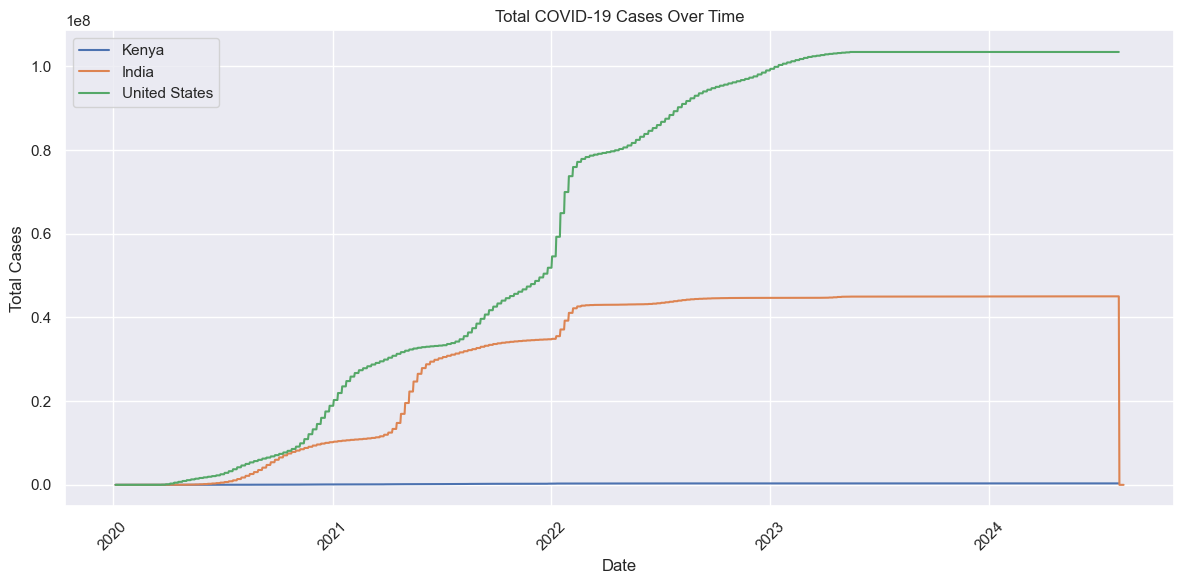

In [10]:
# Plot total cases over time for each country
plt.figure(figsize=(12, 6))

for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Calculate death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Replace inf and NaN values with 0 using the safe method
df['death_rate'] = df['death_rate'].replace([float('inf'), float('nan')], 0)


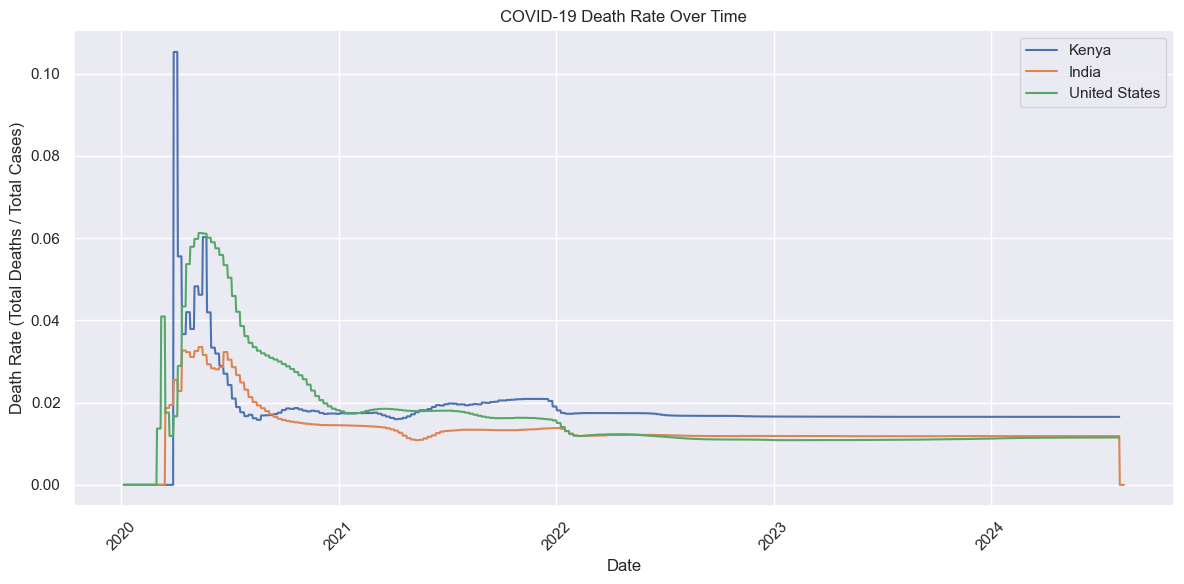

In [14]:
# Plot death rate trends for selected countries
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (Total Deaths / Total Cases)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


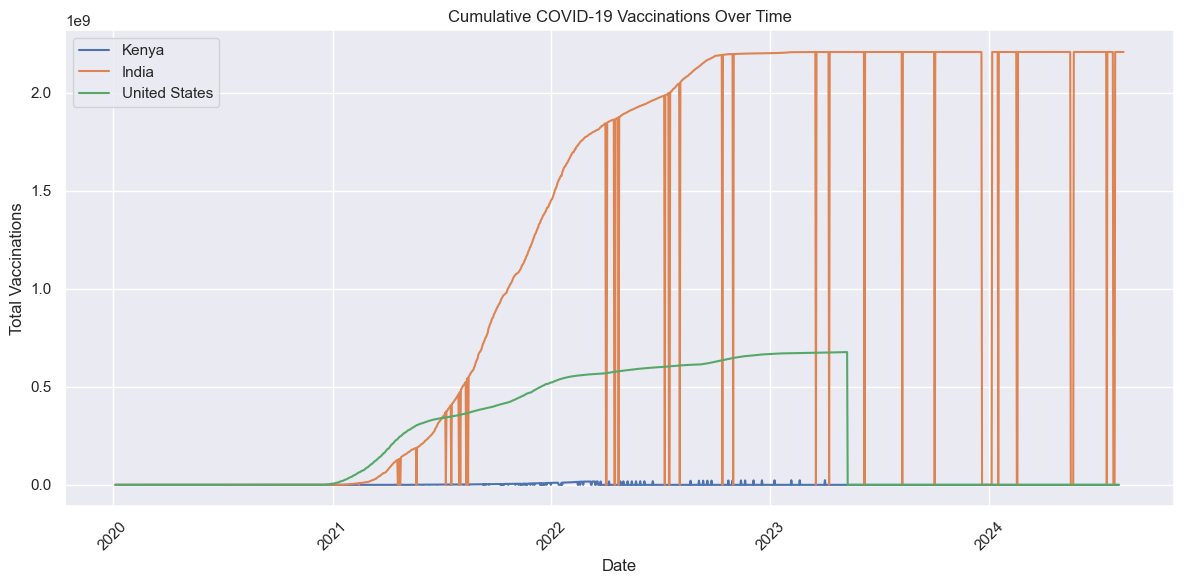

In [15]:
# Plot total vaccinations over time for selected countries
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


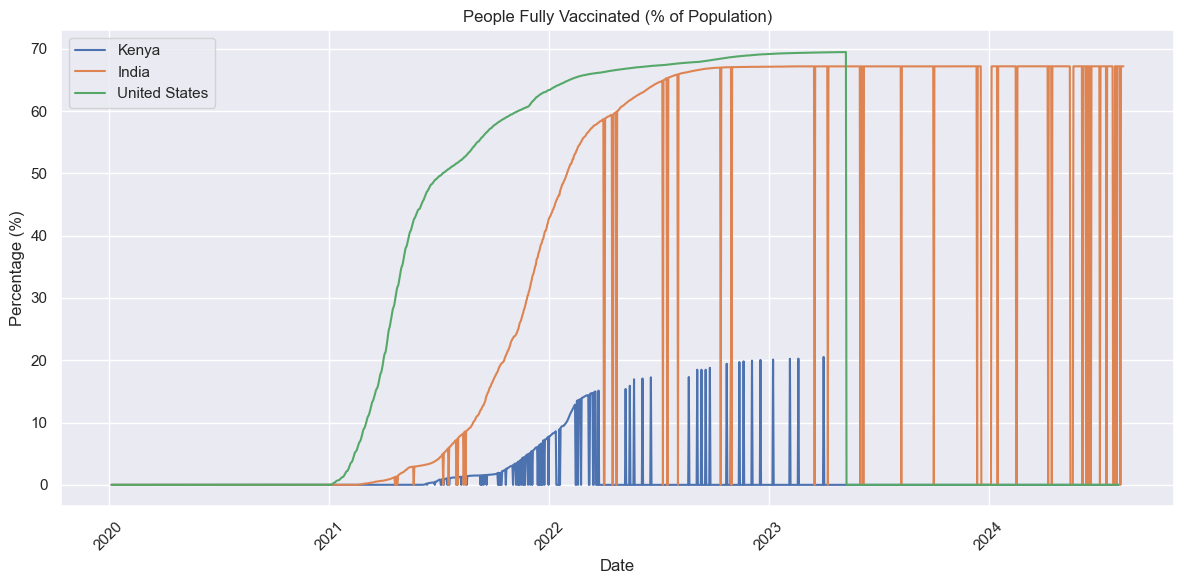

In [16]:
# Plot percentage of people fully vaccinated
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['people_fully_vaccinated_per_hundred'], label=country)

plt.title("People Fully Vaccinated (% of Population)")
plt.xlabel("Date")
plt.ylabel("Percentage (%)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
!pip install plotly

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -----------------------------

In [19]:
import plotly.express as px

# Get the latest data (most recent date in the dataset)
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]

# Filter columns needed for map
map_data = latest_data[['iso_code', 'location', 'total_cases']].dropna()

# Create map
fig = px.choropleth(map_data,
                    locations='iso_code',
                    color='total_cases',
                    hover_name='location',
                    color_continuous_scale='OrRd',
                    title=f'COVID-19 Total Cases by Country as of {latest_date}')
fig.show()


## Key Insights

1. 🇺🇸 **USA** had the highest number of total cases.
2. 🇮🇳 **India** showed major spikes during mid-2021.
3.  Vaccination progress was fastest in developed countries.
